# ADVANCED STATISTICS FOR PHYSICS ANALYSIS - Second Lab

### Student: Alessandro Marcomini (2024286)


### Date: April 25, 2021

In [1]:
library(tidyverse)
options(repr.plot.width=10, repr.plot.height=6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Exercise 1 - Methods comparison
- A set of measurements have been performed on the concentration of a contaminant in tap water. The following table reports a set of values (x), with the corresponding probabilities given by the two methods (p1 and p2). 

In [2]:
x <- c(15.58, 15.9, 16, 16.1, 16.2)
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

tb <- tibble(x,p1,p2)
tb

x,p1,p2
<dbl>,<dbl>,<dbl>
15.58,0.15,0.14
15.90,0.21,0.05
16.00,0.35,0.64
16.10,0.15,0.08
16.20,0.14,0.09


#### Evaluate the expected values, $E[X]$, and the variance, $Var(X)$, for both methods

In [3]:
#First method
y = x*p1                     #single contributions to mean  
z = ((x-sum(y))**2)*p1       #single contributions to var
sprintf("The expected value using the first method is %.5g, while the variance is %.2g", sum(y), sum(z))

#Second method
y = x*p2                     #single contributions to mean
z = ((x-sum(y))**2)*p2       #single contributions to var
sprintf("The expected value using the second method is %.5g, while the variance is %.2g", sum(y), sum(z))

[1] "The expected value using the first method is 15.959, while the variance is 0.034"

[1] "The expected value using the second method is 15.962, while the variance is 0.028"

As one can see, the two methods return really close expected values (compatible within one sigma). The difference between the two of them is of the order of 0.02%

## Exercise 2 - Queue at the doctor's

 • The waiting time, in minutes, at the doctor’s is about $30$ minutes, and the distribution follows an exponential pdf with rate $\lambda = 1/30$.
#### A. Simulate the waiting time for 50 people at the doctor’s office and plot the relative histogram

[1] "Here there are the waiting times for the patiens:"


patient,1.0000000,2.00000,3.00000,4.00000,5.000000,6.00000,7.00000,8.00000,9.0000,10.00000,⋯,41.000000,42.00000,43.00000,44.00000,45.000000,46.000000,47.000000,48.00000,49.000,50.00000
waiting_time,0.4486922,27.60664,22.56477,47.25126,6.949758,32.60019,69.82869,21.87371,38.6493,20.16805,⋯,1.544359,90.88779,2.75159,35.52599,4.324234,4.634398,7.412976,60.46428,111.745,17.87958


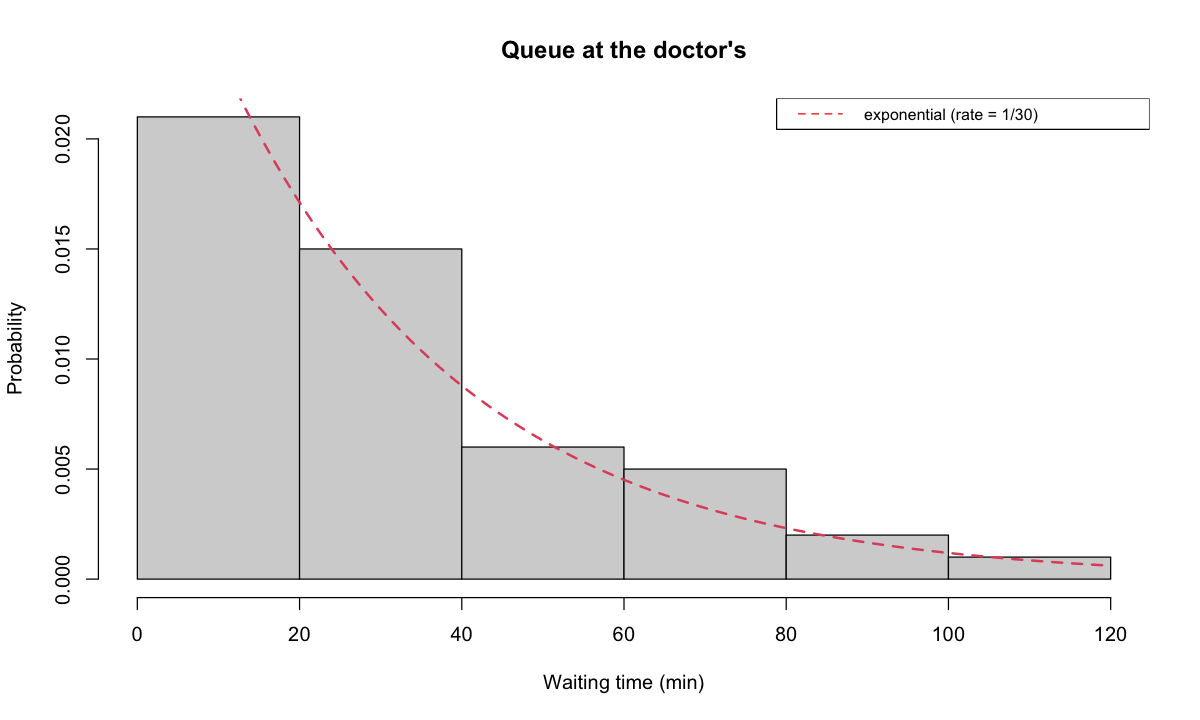

In [4]:
set.seed(10)

#tune the simulation and create database of waiting times
lambda = 1/30
patient <- 1:50
waiting_time <- rexp(50, rate = lambda) 
tb <- tibble(patient, waiting_time)
print('Here there are the waiting times for the patiens:')
t(tb)

#create histogram
hist(tb$waiting_time, prob = TRUE, xlab = 'Waiting time (min)', ylab = 'Probability', main = 'Queue at the doctor\'s')
curve(dexp(x, rate=lambda),col=2,lty=2,lwd=2,add=TRUE)
legend('topright', 'exponential (rate = 1/30)', col='red', lty=2, cex=.8)

As expected, even with some error due to the small number of cases under investigation, the distribution of waiting times recalls an exponential distribution with $\lambda = 1/30$ (red line).

#### B. What is the probability that a person will wait for less than 10 minutes ?

In [5]:
# The probability to wait less than t minutes is given by the lower tail of the CDF
p10 = pexp(10,lambda)
sprintf('The probability to wait less than 10 minutes is %.3g%%', p10*100)

[1] "The probability to wait less than 10 minutes is 28.3%"

#### C. Evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R)

In [6]:
#The average waiting time from the simulation is the mean of the sampled values
avg_sim = mean(waiting_time)

#The average waiting time from the theory of exp distribution is the inverse of the rate
avg_th = 1/lambda

#The average waiting time using the pdf is the sum of [X x p(X)] for a given sample size
f <- function(n){
    x <- seq(0,n)
    px <- dexp(x,lambda)
    avg_pdf <- sum(x*px)
}

sprintf('The average waiting time for the simulated data is: %.3g minutes', avg_sim)
sprintf('The average waiting time from the theory is: 1/rate= %.3g minutes', avg_th)
sprintf('The average waiting time as E[x] = sum(x*p(x)) for n samples is:')
sprintf('n=100 => %.3g minutes', f(100))
sprintf('n=200 => %.3g minutes', f(200))
sprintf('n=300 => %.3g minutes', f(300))
sprintf('n=400 => %.3g minutes', f(400))
sprintf('For higher values of n one can see that the mean is stable at 30 minutes')

[1] "The average waiting time for the simulated data is: 29.9 minutes"

[1] "The average waiting time from the theory is: 1/rate= 30 minutes"

[1] "The average waiting time as E[x] = sum(x*p(x)) for n samples is:"

[1] "n=100 => 25.4 minutes"

[1] "n=200 => 29.7 minutes"

[1] "n=300 => 30 minutes"

[1] "n=400 => 30 minutes"

[1] "For higher values of n one can see that the mean is stable at 30 minutes"

We can see how the simulation averages matches the theoretical one up to a 0.3% error. For sufficiently large n, this is also the value returned by the other estimation.

#### D. What is the probability for waiting more than one hour before being received?


In [7]:
# Similar to point B, but considering the higher tail of ditribution
p60 = pexp(60, lambda, lower.tail=FALSE)
sprintf('The probability to wait more than one hour is %.3g%%', p60*100)

[1] "The probability to wait more than one hour is 13.5%"

## Exercise 3 - Books' typos
- Let’s suppose that on a book, on average, there is one typo error every three pages. Assume the number of errors follows a Poisson distribution.
#### A. Plot the pdf and cdf

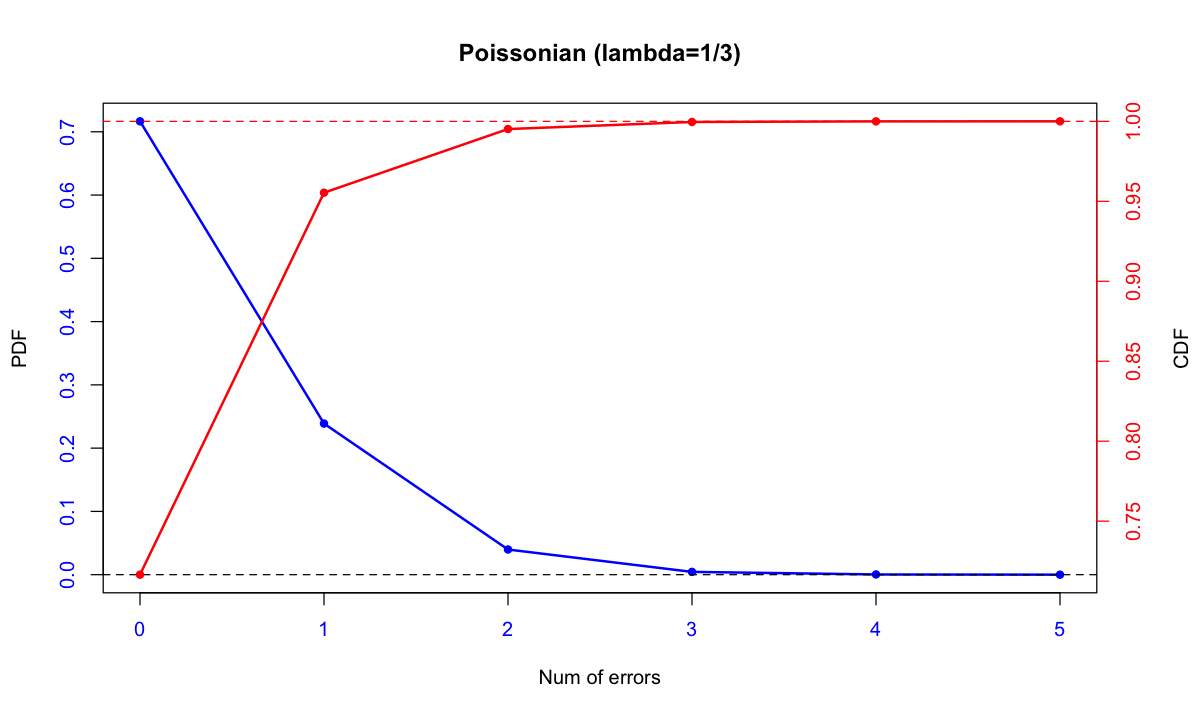

In [8]:
#set rate in pages for Poisson distribution
lambda = 1/3
x <- 0:5

#define stricture for plot with multiple y axes
par(mar = c(5, 4, 4, 4) + 0.3)
plot(x,dpois(x,lambda), pch=20, cex=1.2, col='blue', xlab = 'Num of errors',ylab='PDF', main='Poissonian (lambda=1/3)', col.axis="blue")
lines(x,dpois(x,lambda), col='blue', lty = 1, lw=2)
abline(h=0,lty=2)
par(new=TRUE)
plot(x,ppois(x,lambda), pch=20, cex=1.2, col='red', xlab='', ylab='', yaxt='n', axes=FALSE)
lines(x,ppois(x,lambda), col='red', lty = 1, lw=2)
abline(h=1,lty=2, col='red')
axis(side=4, col='red', ylim=c(0,1),col.axis="red")
mtext("CDF", side=4, line=3)

#### B. Calculate the probability that there is at least one error on a specific page of the book

In [9]:
#The probability to get at least one error on a specific page of the book is the unit 
#minus the probability of having a correct page
p2B = (1-dpois(0, lambda))
sprintf('The probability that there is at least one error on a specific page of the book is %.3g%%', p2B*100)

[1] "The probability that there is at least one error on a specific page of the book is 28.3%"

## Exercise 4 - Unlucky cards
- We randomly draw cards from a deck of 52 cards, with replacement, until one ace is drawn. 
#### Calculate the probability that at least 10 draws are needed.

The "Success" event corresponds to the draw of an ace, which occures with probability $p = 4/52 = 1/13$. If at least 10 drawns are needed before an ace occurs, then we must calculate the probability of extracting a non-ace card for the first nine trials and substract it from the unity:

In [10]:
p = 1/13
p_success = ((1-p)**9)

sprintf('The probability to need at least 10 drawns to get an ace is  %.3g%%', p_success*100)
#I am aware of the fact that maybe a negative binomial distribution could have been exploited as well, 
#but this just looked like the simplest way to do this exercise to me

[1] "The probability to need at least 10 drawns to get an ace is  48.7%"

## Exercise 5 - University tests
- The time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form
$$
f(X) = \left\{ \begin{array}{2}
c(t-1)(2-t) & 1<t<2 \\
0 & \mbox{otherwise}
\end{array}
\right.
$$
where t is the time in hours.
#### A. Using the integrate() R function, determine the constant c (and verify it analytically)

In [11]:
#Define non-normalized function:
fun <- function(t){
    (t-1)*(2-t)
}

#Calculate integral with "integrate()"
a = integrate(fun,1,2)
c <- 1/a$value
sprintf('The coefficient $c$ of normalization is estimated to be %.i', c)

[1] "The coefficient $c$ of normalization is estimated to be 6"

Analitically we verify it is the correct value:
$$
\int_1^2 c(t-1)(2-t) \ dt = c \int_1^2 (-t^2 + 3t - 2) \ dt = c \left[-\frac{t^3}{3} + 3\frac{t^2}{2} - 2t \right]^2_1 = c \left[ \left(- \frac{2}{3}\right) - \left(-\frac{5}{6}\right) \right] = \frac{c}{6} \overset{!}{=} 1 \implies c = 6
$$

#### B. Write the set of four R functions and plot the pdf and cdf, respectively

From the calculation above it is straightforward to see that the CDF is:
$$
F(t) = 5 -12t +9t^2 -2t^3 
$$
In order to define a quantile function we will need to invert this function, which is indeed bijiective in the $[1,2]$ interval. To do so, we exploit the "polyroot" method of R and impose the roots to be in the specified range.

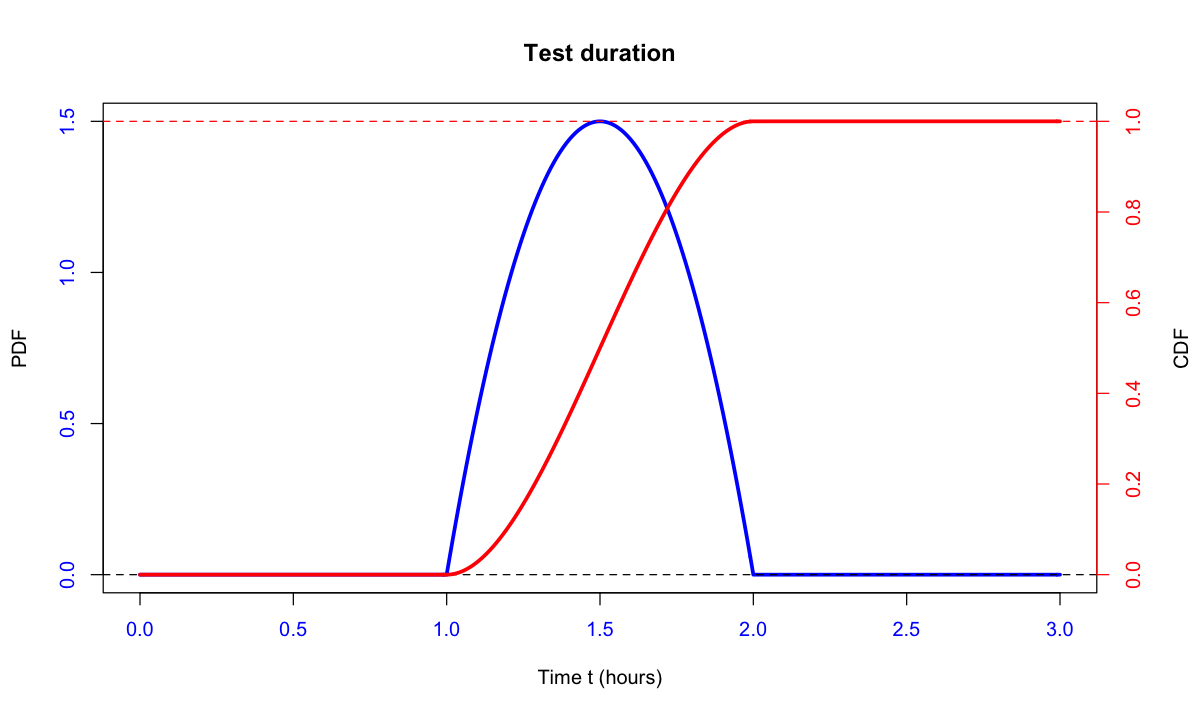

In [12]:
#define internal function and pdf 
f <- function(t){
    6*(t-1)*(2-t)
    }
dex5  <- function(t){
    if (1<t && t<2) f(t)
    else 0
    }

#define internal function and cdf 
F <- function(t){
    a = 5 -12*t +9*t**2 -2*t**3 
    }
pex5  <- function(t){
    if (t<=1) 0
    else if (1<t && t<2) F(t)
    else 1
    }

#define quantile function
qex5 <- function(q){
    X <- abs(polyroot(c(5-q,-12,9,-2)))  #extract roots of 3-deg poly (always ok in [1,2])
    X <- X[X>=1]
    X <- X[X<=2]                         #save only solution in [1,2]
    }

#define random generative function
rex5  <- function(n){
    u <- runif(n)
    b = Vectorize(qex6)(u)
    }


#Plotting pdf and cdf
x <- seq(0,3,0.01)

PDF_data = Vectorize(dex5)(x)
CDF_data = Vectorize(pex5)(x)
par(mar = c(5, 4, 4, 4) + 0.3)
plot(x,PDF_data, pch=20, cex=.1, col='blue', xlab = 'Time t (hours)',ylab='PDF', main='Test duration', col.axis="blue")
lines(x,PDF_data, col='blue', lty = 1, lw=3)
abline(h=0,lty=2)
par(new=TRUE)
plot(CDF_data, pch=20, cex=.1, col='red', xlab='', ylab='', yaxt='n', axes=FALSE)
lines(CDF_data, col='red', lty = 1, lw=3)
abline(h=1,lty=2, col='red')
axis(side=4, col='red', ylim=c(0,1),col.axis="red")
mtext("CDF", side=4, line=3)

#### C. Evaluate the probability that the student will finish the aptitude test in more than 75 minutes. And that it will take 90 and 120 minutes.

In [13]:
#Using the CDF
p75 = 1-pex5(1.25)                #75 min = 1.25 h
p90_120 = pex5(2) - pex5(1.5)     #90 min = 1.5 h

sprintf('The probability to finish in more than 75 minutes is %.3g%%', 100*p75)
sprintf('The probability to finish between 90 and 120 minutes is %.3g%%', 100*p90_120)

[1] "The probability to finish in more than 75 minutes is 84.4%"

[1] "The probability to finish between 90 and 120 minutes is 50%"

## Exercise 6 - Lifetime of tires
- The lifetime of tires sold by an used tires shop is $10^4 \cdot x \ km$, where x is a random variable following the distribution funcion
$$
f(X) = \left\{ \begin{array}{2}
2/x^2 & 1<x<2 \\
0 & \mbox{otherwise}
\end{array}
\right.
$$
#### A. Write the set of four R functions and plot the pdf and cdf, respectively

Let us focus on the non-null probability region: the function internal to f is already normalized and we have
$$
F(x) = \int_1^x \frac{2}{x^2} \ dx = 2\left(1-\frac{1}{x}\right) \implies F^{-1}(y) = \frac{2}{2-y}
$$
We do not have problems due to the positive support of $y \in (0,1)$.
We can thus define the CDF and the other functions.

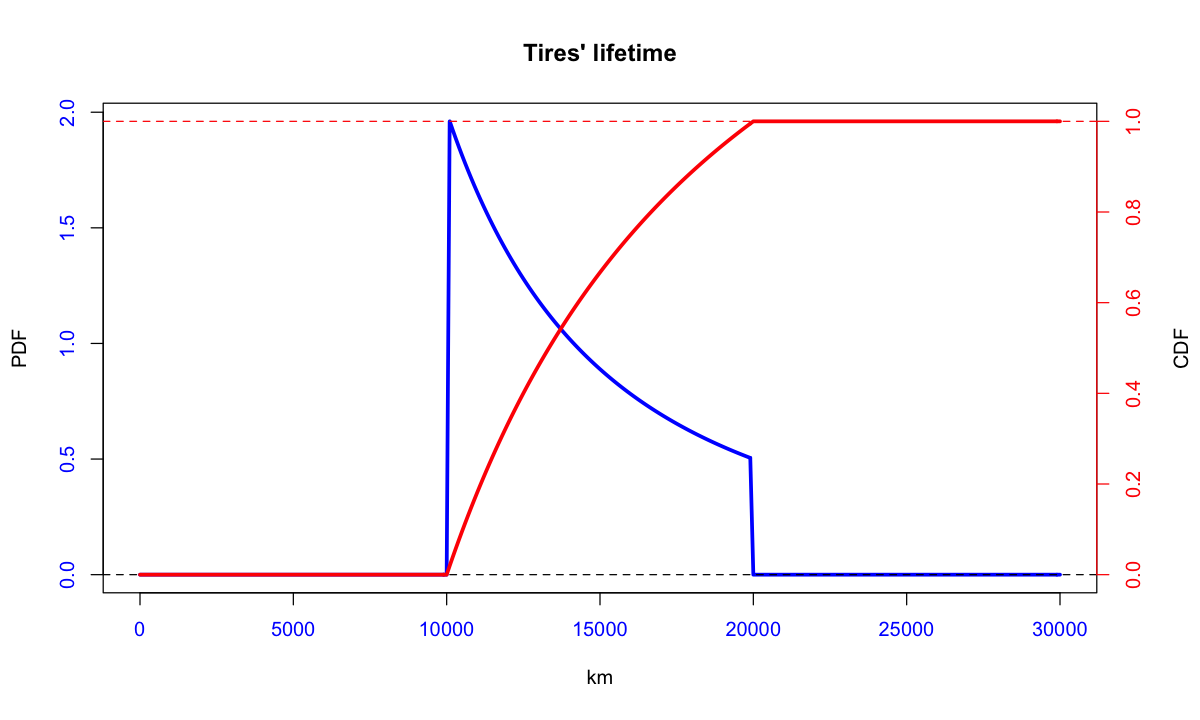

In [14]:
#define internal function and pdf 
f <- function(x){
    2/(x**2)
    }
dex6  <- function(x){
    if (1<x && x<2) f(x)
    else 0
    }

#define internal function and cdf 
F <- function(x){
    a = 2-(2/x)
    }
pex6  <- function(x){
    if (x<=1) 0
    else if (1<x && x<2) F(x)
    else 1
    }

#define quantile function
qex6  <- function(q){
    b = 2/(2-q)
    }

#define random generative function
rex6  <- function(n){
    u <- runif(n)
    b = Vectorize(qex6)(u)
    }


#Plotting pdf and cdf
x <- seq(0,3,0.01)

PDF_data = Vectorize(dex6)(x)
CDF_data = Vectorize(pex6)(x)
par(mar = c(5, 4, 4, 4) + 0.3)
plot(10000*x,PDF_data, pch=20, cex=.1, col='blue', xlab = 'km',ylab='PDF', main='Tires\' lifetime', col.axis="blue")
lines(10000*x,PDF_data, col='blue', lty = 1, lw=3)
abline(h=0,lty=2)
par(new=TRUE)
plot(CDF_data, pch=20, cex=.1, col='red', xlab='', ylab='', yaxt='n', axes=FALSE)
lines(CDF_data, col='red', lty = 1, lw=3)
abline(h=1,lty=2, col='red')
axis(side=4, col='red', ylim=c(0,1),col.axis="red")
mtext("CDF", side=4, line=3)

#### B. Determine the probability that tires will last less than 15000 km

In [15]:
#Using the CDF:
p15000 = pex6(1.5)      #15000 km -> x=1.5

sprintf('The probability for the tires to last shorter is F(x=1.5)=%.3g%%', p15000*100)

[1] "The probability for the tires to last shorter is F(x=1.5)=66.7%"

#### C. Sample $3000$ random variables from the distribution and determine the mean value and the variance, using the expression $Var(X) = E[X^2] − E[X]^2$

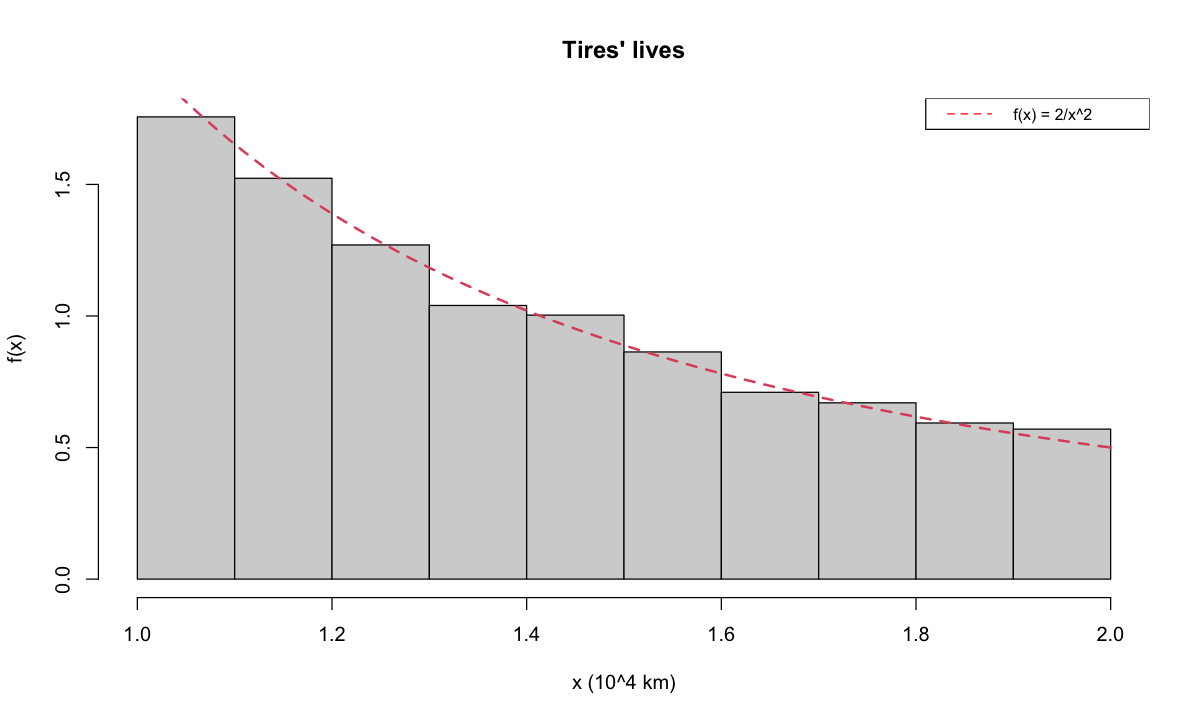

In [16]:
set.seed(100)

#Sample data
nsamples = 3000
x <- rex6(nsamples)

#Plot
hist(x, prob = TRUE, xlab = 'x (10^4 km)', ylab = 'f(x)', main = 'Tires\' lives')
curve(f(x),col=2,lty=2,lwd=2,add=TRUE)
legend('topright', 'f(x) = 2/x^2', col='red', lty=2, cex=0.8)

As it is noticeable from the graph above, the theoretical curve matches the histogram.

In [17]:
x_mean = mean(x)
x_var = mean(x**2)-x_mean**2

sprintf('The mean lifetime of tires from the histogram is %.f km, while the variance is Var(x)=%.f km',x_mean*10000,x_var*10000)

[1] "The mean lifetime of tires from the histogram is 13920 km, while the variance is Var(x)=786 km"